# Test of CSV file produced using ROOT converter

In this notebook I'll test the macro, written in python, used for converting a ROOT structure (Tree) into a CSV file for ML analysis.

The CSV is located inside the directory output, created by the python macro **examplemacro.py**:

In [1]:
!ls /Users/tommaso/TESI_MAGISTRALE/MuonPOGAnalysisTemplate/

MuonTree.root   config          exampleMacro.C  interface       results
README.md       exampleMacro    exampleMacro.py output          tdrstyle.C


In [2]:
%cd /Users/tommaso/TESI_MAGISTRALE/MuonPOGAnalysisTemplate/output
!head -5 output_bxcut.csv

/Users/tommaso/TESI_MAGISTRALE/MuonPOGAnalysisTemplate/output







To analyze it, we need the ROOT python module and pandas for the CSV analysis:

In [3]:
from ROOT import TH1F,TCanvas,TFile
import pandas as pd

Welcome to JupyROOT 6.12/04


Now we need to read the CSV:

In [4]:
df = pd.read_csv('./output_bxcut.csv')

This creates a pandas db that can be displayed showing its content:

In [15]:
df

,Event,dtPrimitive.id_r,dtPrimitive.id_eta,dtPrimitive.id_phi,dtPrimitive.bxTrackFinder(),dtPrimitive.phiGlb(),genParticle.pt,dtPrimitive.bx
0,1,1,1,2,0,0.547525,9.452828,0
1,1,2,1,2,0,0.519693,9.452828,0
2,1,3,2,2,0,0.499429,9.452828,0
3,1,4,2,2,0,0.489663,9.452828,0
4,2,4,1,1,0,-0.322266,164.478928,0
5,2,3,1,12,0,5.961246,164.478928,0
6,3,1,0,4,0,1.816158,91.713860,0
7,3,3,0,4,0,1.812007,91.713860,0
8,3,4,0,4,0,1.811519,91.713860,0
9,4,2,-2,10,0,4.605700,139.442352,0


Using pyROOT we create an histogram:

In [6]:
c1 = TCanvas("c1","c1")
histo = TH1F("test_histogram_cut1","id_r test plot",5,0,5)

Now we loop in a column and we fill a histogram with it

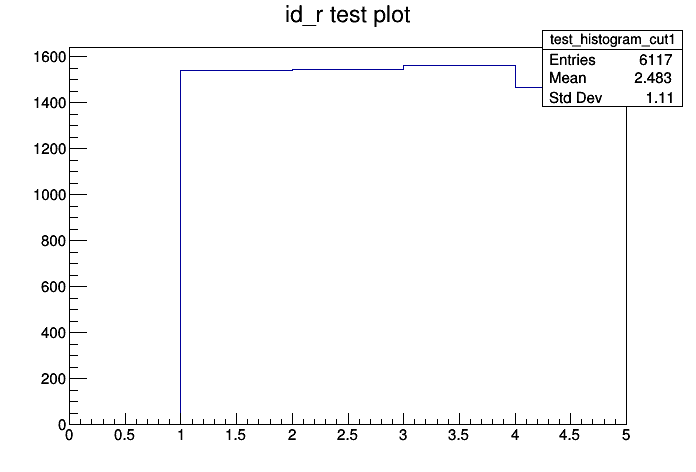

In [7]:
for index, row in df.iterrows():
    histo.Fill(row[1])
histo.Draw()
c1.Draw()

The same for another variable, for instance, **Pt** of the generated muon

In [8]:
c2 = TCanvas("c2","c2")
histo2 = TH1F("test_histogram_cut2","pt test plot",100,0,215)

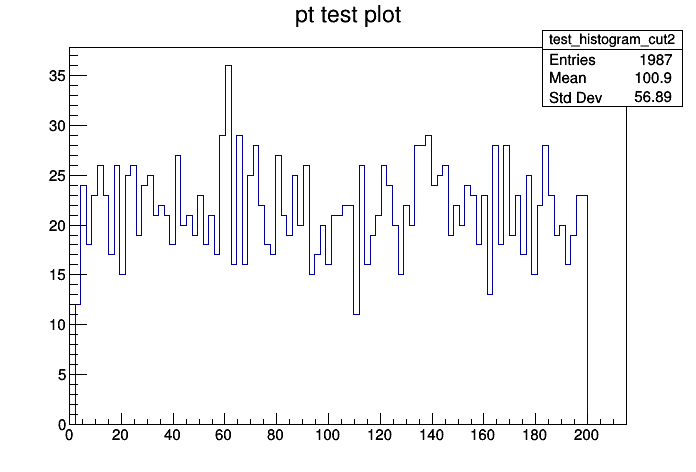

In [9]:
a = 0
for index, row in df.iterrows():
    if(row[0] == a):
        continue
    #print row[6]
    histo2.Fill(row[6])
    a = row[0]
histo2.Draw()
c2.Draw()